# Modularity
This notebook shows how to think about the modularity of a graph, as it is used in a large number of community detection algorithms as an optimization objective to find and label nodes as members of different communities.

### Import

In [10]:
import numpy as np
import os
import sys
import networkx as nx
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal as mnorm
from tqdm import tqdm
import networkx.algorithms.community as nxcomm
from scipy.spatial.distance import cdist
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform

### Fonts

In [11]:
csfont = {'fontname':'Georgia'}
hfont = {'fontname':'Helvetica'}

### Communitity Colors 

In [12]:
community_colors = np.zeros((2,3))
community_colors[0,0] = 1
community_colors[1,2] = 1

### Distance Matrix to Graph

In [13]:
def distance2graph(D,threshold):
    
    #Distance to Graph
    G = {}
    edgelist = []
    for i in range(D.shape[0]):
        v = D[i,:]
        edges = np.where(v < threshold)[0]
        edges = [edge for edge in edges if edge != i]
        G[i] = edges
        for edge in edges:
            edgelist.append((i,edge))

    #Return
    return G,edgelist

### Create Three Synthetic Graphs with varrying amounts of seperation

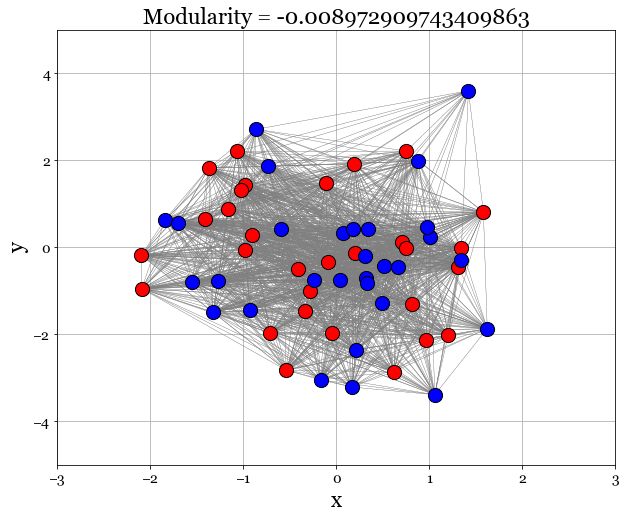

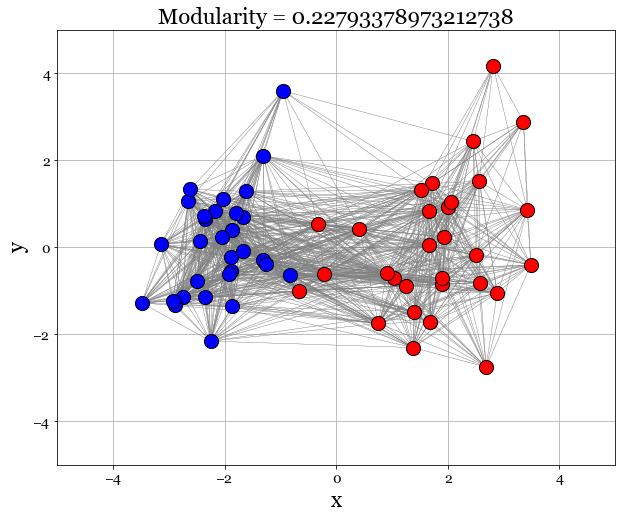

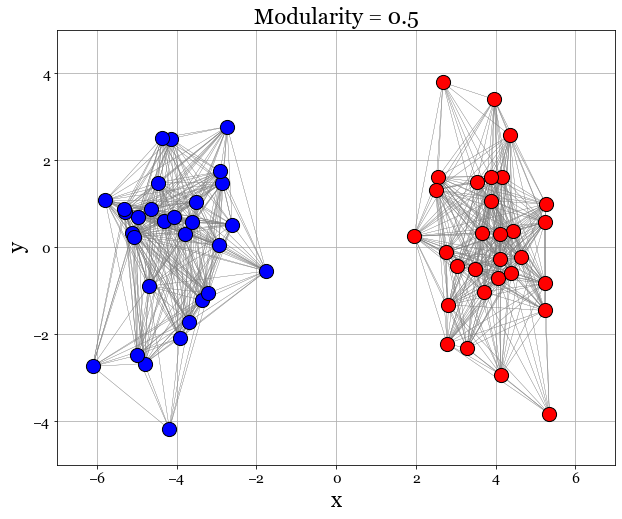

In [16]:
no_nodes = 30
threshold = 3.75
np.random.seed(seed=600)
for d in range(3):
    distance = d*2
    rv1 = mnorm([-distance,0],[[1.00,0],[0,1.00]])
    rv2 = mnorm([+distance,0],[[1.00,0],[0,1.00]])
    x1 = rv1.rvs(no_nodes)
    x2 = rv2.rvs(no_nodes)
    X = np.vstack((x1,x2))
    X[:,1] = X[:,1] * 1.5
    C = np.zeros((X.shape[0]))
    C[:no_nodes] = 1
    C = C.astype(int)
    D = squareform(pdist(X))
    G,edgelist = distance2graph(D,threshold)
    nCom = len(np.unique(C))
    Cset = [set(np.array(range(no_nodes))),set(30+np.array(range(no_nodes)))]
    
    nxG = nx.Graph(edgelist)
    modularity = nxcomm.modularity(nxG,Cset)    
    
    plt.figure(figsize=(10,8))
    for node1 in G:
        edges = G[node1]
        for node2 in edges:
            xy1 = X[node1,:]
            xy2 = X[node2,:]
            plt.plot([xy1[0],xy2[0]],[xy1[1],xy2[1]],c=(0.5,0.5,0.5),linewidth=0.25)
    for i in range(nCom):
        idx = np.where(C == i)[0]
        plt.scatter(X[idx,0],X[idx,1],s=200,edgecolor='k',color=community_colors[i,:],zorder=1000);

    plt.grid();
    plt.axis((-3-(d*2),3+(d*2),-5,5));
    plt.xticks(fontsize=14,**csfont);
    plt.yticks(fontsize=14,**csfont);
    plt.xlabel('x',fontsize=22,**csfont);
    plt.ylabel('y',fontsize=22,**csfont);
    plt.title('Modularity = ' + str(modularity),fontsize=22,**csfont)
    plt.savefig('../../assets/figures/020/modularity_' + str(d) + '.png',dpi=300,bbox_inches="tight")